# Anomaly Detection with Autoencoder in PyTorch - TEST FOR WPAD PROJECT 

### 1. **Data Preprocessing**
   - **Audio Feature Extraction**:
     - Techniques include extracting features such as Mel-Frequency Cepstral Coefficients (MFCCs), spectrograms, or log-mel spectrograms. In particular here we have focused on delta and delta 2 additionals over MFCCs. 
   - **Normalization and Augmentation**:
     - The extracted features are likely normalized to ensure consistent input scales for the model
---

### 2. **Recurrent Autoencoder Implementation**
   - **Autoencoder Structure**:
     - The notebook employs a recurrent neural network (RNN)-based architecture, such as Long Short-Term Memory (LSTM) or Gated Recurrent Units (GRUs), to capture temporal dependencies in the audio data.
     - The autoencoder consists of:
       - An **encoder** to compress input features into a latent representation.
       - A **decoder** to reconstruct the input from the latent representation.
   - **Objective**:
     - The model is trained to minimize the reconstruction error, which should be significantly higher for anomalous inputs.

---

### 3. **Machine Learning Models**
   - **Integration with Machine Learning**:
     - Features extracted by the recurrent autoencoder have been used as inputs to classical machine learning models (e.g., Support Vector Machines, Random Forests, or Gradient Boosting) for anomaly classification.

---

### 4. **Training and Optimization**
   - **Training Process**:
     - The autoencoder is trained using a loss function such as Mean Squared Error (MSE).
   - **Optimization**:
     - Gradient descent-based optimizers (e.g., Adam or RMSprop) are used to minimize the loss.

---

### 5. **Evaluation and Results**
   - **Performance Metrics**:
     - Reconstruction error thresholds are analyzed to differentiate normal from anomalous data.
     - Metrics such as Precision, Recall, F1-score, and ROC-AUC are be calculated to evaluate the effectiveness of the model.
   - **Visualizations**:
     - Loss curves during training.
     - Reconstruction errors for normal and anomalous samples.
     - Confusion matrices or threshold-vs-performance plots.



In [1]:
import os
dataset_base_path = "./water pump audio for anomaly detection/" 

train_normal_path = os.path.join(dataset_base_path, "train-normal")
test_normal_path = os.path.join(dataset_base_path, "test-normal")
anomaly_path = os.path.join(dataset_base_path, "anomaly")

In [2]:
import librosa
import numpy as np

def load_audio_files(path, sr=22050, duration=10):
    audio_files = []
    for file in os.listdir(path):
        if file.endswith(".wav"):
            file_path = os.path.join(path, file)
            audio, _ = librosa.load(file_path, sr=sr, duration=duration)
            audio_files.append(audio)
    return np.array(audio_files)

In [3]:
train_normal_files = load_audio_files(train_normal_path)
test_normal_files = load_audio_files(test_normal_path)
anomaly_files = load_audio_files(anomaly_path)

In [4]:
def extract_mfcc_features(audio_files, sr=22050, n_mfcc=20):
    mfcc_features = []
    for audio in audio_files:
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfcc_features.append(mfcc)
    return np.array(mfcc_features)

def extract_delta_mfcc_features(mfcc_features):
  return librosa.feature.delta(mfcc_features)

def extract_delta2_mfcc_features(mfcc_features):
  return librosa.feature.delta(mfcc_features, order=2)

def combine_mfcc_features(mfcc_features, delta_mfcc_features, delta2_mfcc_features):
  return np.concatenate((mfcc_features, delta_mfcc_features, delta2_mfcc_features), axis=2)

In [5]:
train_mfcc_features = extract_mfcc_features(train_normal_files)
train_mfcc_delta_features = extract_delta_mfcc_features(train_mfcc_features)
train_mfcc_delta2_features = extract_delta2_mfcc_features(train_mfcc_features)

test_mfcc_features = extract_mfcc_features(test_normal_files)
test_mfcc_delta_features = extract_delta_mfcc_features(test_mfcc_features)
test_mfcc_delta2_features = extract_delta2_mfcc_features(test_mfcc_features)

anomaly_mfcc_features = extract_mfcc_features(anomaly_files)
anomaly_mfcc_delta_features = extract_delta_mfcc_features(anomaly_mfcc_features)
anomaly_mfcc_delta2_features = extract_delta2_mfcc_features(anomaly_mfcc_features)

In [6]:
print(train_mfcc_features.shape)
print(train_mfcc_delta_features.shape)
print(train_mfcc_delta2_features.shape)

print(test_mfcc_features.shape)
print(test_mfcc_delta_features.shape)
print(test_mfcc_delta2_features.shape)

print(anomaly_mfcc_features.shape)
print(anomaly_mfcc_delta_features.shape)
print(anomaly_mfcc_delta2_features.shape)

(2241, 20, 431)
(2241, 20, 431)
(2241, 20, 431)
(400, 20, 431)
(400, 20, 431)
(400, 20, 431)
(456, 20, 431)
(456, 20, 431)
(456, 20, 431)


In [7]:
train_mfcc_features = train_mfcc_features.transpose(0, 2, 1)
train_mfcc_delta_features = train_mfcc_delta_features.transpose(0, 2, 1)
train_mfcc_delta2_features = train_mfcc_delta2_features.transpose(0, 2, 1)

test_mfcc_features = test_mfcc_features.transpose(0, 2, 1)
test_mfcc_delta_features = test_mfcc_delta_features.transpose(0, 2, 1)
test_mfcc_delta2_features = test_mfcc_delta2_features.transpose(0, 2, 1)

anomaly_mfcc_features = anomaly_mfcc_features.transpose(0, 2, 1)
anomaly_mfcc_delta_features = anomaly_mfcc_delta_features.transpose(0, 2, 1)
anomaly_mfcc_delta2_features = anomaly_mfcc_delta2_features.transpose(0, 2, 1)

In [8]:
print(train_mfcc_features.shape)
print(train_mfcc_delta_features.shape)
print(train_mfcc_delta2_features.shape)

print(test_mfcc_features.shape)
print(test_mfcc_delta_features.shape)
print(test_mfcc_delta2_features.shape)

print(anomaly_mfcc_features.shape)
print(anomaly_mfcc_delta_features.shape)
print(anomaly_mfcc_delta2_features.shape)

(2241, 431, 20)
(2241, 431, 20)
(2241, 431, 20)
(400, 431, 20)
(400, 431, 20)
(400, 431, 20)
(456, 431, 20)
(456, 431, 20)
(456, 431, 20)


In [9]:
print(np.mean(train_mfcc_features, axis=(0, 1)))
print(np.std(train_mfcc_features, axis=(0, 1)))

[-319.93805     140.8861      -58.68744      69.78906     -42.427807
   51.037354    -28.234417     28.478525    -16.219477      8.359261
   -0.77478385   -2.9664936     9.348087    -13.183616     15.227369
  -12.8544       12.349816    -11.598909      7.2319922    -4.3574514 ]
[16.733097  14.79675   12.867975  10.41961    9.225545   6.860077
  8.463519   6.0726953  5.2199483  4.8461113  4.890217   5.8585978
  5.6116095  5.3657575  4.865934   5.261503   4.916163   5.3106685
  4.8404555  5.0357285]


In [10]:
print(np.mean(anomaly_mfcc_features, axis=(0, 1)))
print(np.std(anomaly_mfcc_features, axis=(0, 1)))

[-304.97168     141.61324     -59.84097      67.75717     -44.847965
   46.98575     -28.37446      26.932156    -17.494556      7.2536144
   -0.56628424   -5.220806      9.010012    -11.277827     14.912355
  -12.050111     12.968585    -10.409133      6.338522     -5.317994  ]
[29.375875  17.6061    12.821865  12.010669   9.336699   9.919124
  7.6562204  6.8385596  6.033835   5.1771765  5.06318    5.4918213
  5.3479137  4.9937873  4.920779   5.3926034  4.890999   5.5275116
  5.016534   4.8490953]


In [12]:
def normalize_features(train_mfcc_features, test_mfcc_features, anomaly_mfcc_features):
  train_means = np.mean(train_mfcc_features, axis=(0, 1), keepdims=True)
  train_stds = np.std(train_mfcc_features, axis=(0, 1), keepdims=True) + 1e-8
  train_mfcc_features_scaled = (train_mfcc_features - train_means) / train_stds
  test_mfcc_features_scaled = (test_mfcc_features - train_means) / train_stds
  anomaly_mfcc_features_scaled = (anomaly_mfcc_features - train_means) / train_stds
  return train_mfcc_features_scaled, test_mfcc_features_scaled, anomaly_mfcc_features_scaled

In [13]:
train_mfcc_features_scaled, test_mfcc_features_scaled, anomaly_mfcc_features_scaled = normalize_features(train_mfcc_features, test_mfcc_features, anomaly_mfcc_features)
train_mfcc_delta_features_scaled, test_mfcc_delta_features_scaled, anomaly_mfcc_delta_features_scaled = normalize_features(train_mfcc_delta_features, test_mfcc_delta_features, anomaly_mfcc_delta_features)
train_mfcc_delta2_features_scaled, test_mfcc_delta2_features_scaled, anomaly_mfcc_delta2_features_scaled = normalize_features(train_mfcc_delta2_features, test_mfcc_delta2_features, anomaly_mfcc_delta2_features)

In [14]:
train_mfcc_features_combined = combine_mfcc_features(train_mfcc_features_scaled, train_mfcc_delta_features_scaled, train_mfcc_delta2_features_scaled)
test_mfcc_features_combined = combine_mfcc_features(test_mfcc_features_scaled, test_mfcc_delta_features_scaled, test_mfcc_delta2_features_scaled)
anomaly_mfcc_features_combined = combine_mfcc_features(anomaly_mfcc_features_scaled, anomaly_mfcc_delta_features_scaled, anomaly_mfcc_delta2_features_scaled)

In [15]:
print(train_mfcc_features_combined.shape)
print(test_mfcc_features_combined.shape)
print(anomaly_mfcc_features_combined.shape)

(2241, 431, 60)
(400, 431, 60)
(456, 431, 60)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input dimensions
time_steps = 431  # Number of time frames
n_mfcc = 60       # Number of MFCC coefficients
latent_dim = 64   # Dimension of the latent space

# Encoder
encoder_inputs = tf.keras.Input(shape=(time_steps, n_mfcc))
encoded = layers.LSTM(128, return_sequences=True)(encoder_inputs)
encoded = layers.LSTM(latent_dim, return_sequences=False)(encoded)

# Decoder
decoded = layers.RepeatVector(time_steps)(encoded)
decoded = layers.LSTM(128, return_sequences=True)(decoded)
decoded = layers.LSTM(n_mfcc, return_sequences=True)(decoded)

# Autoencoder
autoencoder = models.Model(encoder_inputs, decoded, name="Recurrent_Autoencoder")

# Encoder model (for extracting latent space representation)
latent_model = models.Model(encoder_inputs, encoded, name="Encoder")

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()
latent_model.summary()


Model: "Recurrent_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 431, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 431, 128)       │        96,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 431, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 431, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 431, 60)        │        45,360 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,352 (1.11 MB)

 Trainable params: 290,352 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 431, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 431, 128)       │        96,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,176 (571.00 KB)

 Trainable params: 146,176 (571.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
autoencoder.fit(
    train_mfcc_features_combined,
    train_mfcc_features_combined,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 508ms/step - loss: 0.9457 - val_loss: 0.8708
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 506ms/step - loss: 0.8701 - val_loss: 0.8561
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 491ms/step - loss: 0.8528 - val_loss: 0.8505
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 491ms/step - loss: 0.8585 - val_loss: 0.8448
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 504ms/step - loss: 0.8407 - val_loss: 0.8413
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 502ms/step - loss: 0.8407 - val_loss: 0.8373
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 487ms/step - loss: 0.8433 - val_loss: 0.8331
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 492ms/step - loss: 0.8287 - val_loss: 0.8297
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 504ms/step - loss: 0.8282 - val_loss: 0.8287
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 504ms/step - loss: 0.8240 - val_loss: 0.8270
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 511ms/step - loss: 0.8188 - val_loss: 0.8262
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28

In [19]:
# Predict reconstruction for normal and anomalous data
normal_reconstruction = autoencoder.predict(test_mfcc_features_combined)
anomaly_reconstruction = autoencoder.predict(anomaly_mfcc_features_combined)

# Non aggiungere una nuova dimensione [..., None] poiché non è necessaria
# Calcola l'errore di ricostruzione direttamente
normal_error = np.mean(np.square(test_mfcc_features_combined - normal_reconstruction), axis=(1, 2))
anomaly_error = np.mean(np.square(anomaly_mfcc_features_combined - anomaly_reconstruction), axis=(1, 2))

# Mostra i risultati
print("Normal Reconstruction Error:", normal_error)
print("Anomalous Reconstruction Error:", anomaly_error)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step
Normal Reconstruction Error: [0.637342   0.55705774 1.0840608  0.7443871  1.0176879  0.6529448
 0.72057927 0.6306314  0.7466055  1.5684638  0.5987369  0.7407258
 0.6973425  0.660015   1.1188682  0.5564432  1.293216   1.3916389
 0.58648247 0.51576585 1.1204212  1.4865621  0.8088872  0.63782203
 0.5109008  0.7666731  0.8454408  0.6752862  0.6219505  0.60674936
 0.6939255  0.6313041  0.7480922  1.12612    0.611861   0.7207645
 0.5044335  0.8134665  0.5072204  1.2041786  0.50735945 0.47114068
 0.86963207 0.7509752  0.8689509  1.1885372  0.74329984 1.0053258
 0.4578653  0.46921697 1.4462019  0.8485069  0.6014159  0.66438234
 0.72055084 0.96204925 0.63743496 1.1027606  0.56756884 0.59400344
 0.6145146  0.82123715 0.50643635 0.5230927  0.5440408  0.5487415
 1.6412361  0.5599176  0.8109613  0.8264545  0.8984839  0.5734903
 0.86779433 1.4328163  0.89498615 0.77573246 0.78419447 0.74982893
 0.81264937 0.48665288 0.

In [20]:
import numpy as np

# Calculate reconstruction error for normal data
normal_error = np.mean(np.square(test_mfcc_features_combined - normal_reconstruction), axis=(1, 2))

# Calculate reconstruction error for anomalous data
anomaly_error = np.mean(np.square(anomaly_mfcc_features_combined - anomaly_reconstruction), axis=(1, 2))


In [21]:
# Determine the threshold (e.g., 95th percentile of normal error)
threshold = np.percentile(normal_error, 85)
print("Reconstruction Error Threshold:", threshold)


Reconstruction Error Threshold: 1.0066449284553527


In [23]:
# Classify normal and anomalous data
normal_predictions = normal_error > threshold
anomaly_predictions = anomaly_error > threshold

# Count anomalies
print(f"Number of anomalies in normal data: {np.sum(normal_predictions)}")
print(f"Number of anomalies in anomalous data: {np.sum(anomaly_predictions)}")


Number of anomalies in normal data: 60
Number of anomalies in anomalous data: 134


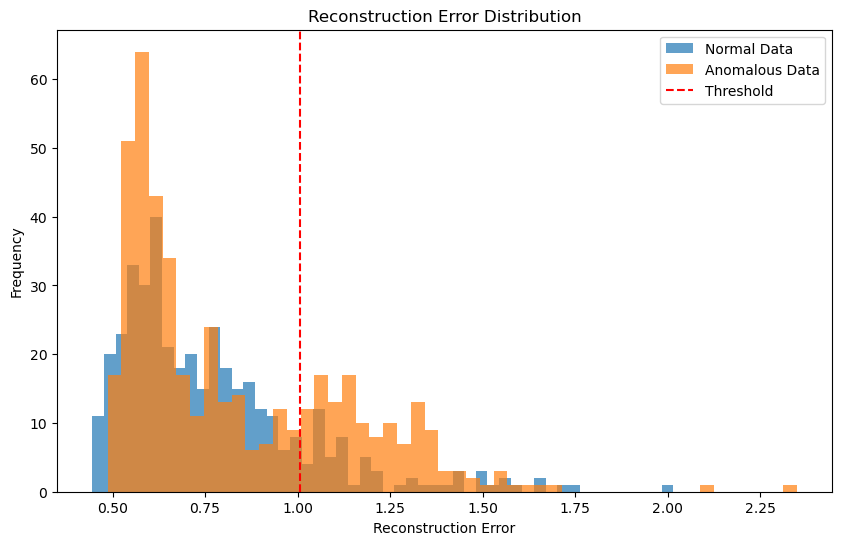

In [24]:
import matplotlib.pyplot as plt

# Plot reconstruction error distributions
plt.figure(figsize=(10, 6))
plt.hist(normal_error, bins=50, alpha=0.7, label='Normal Data')
plt.hist(anomaly_error, bins=50, alpha=0.7, label='Anomalous Data')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


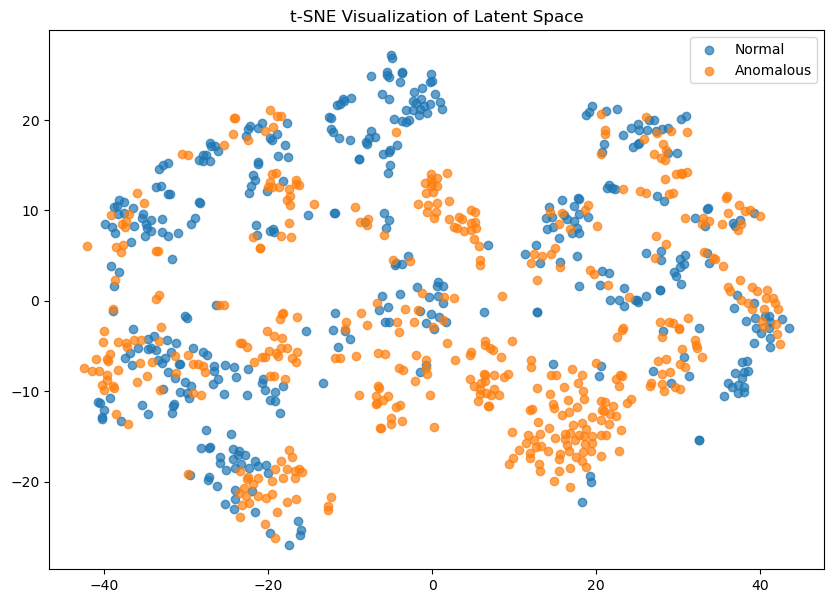

In [25]:
from sklearn.manifold import TSNE

# Get latent representations
normal_latent = latent_model.predict(test_mfcc_features_combined)
anomaly_latent = latent_model.predict(anomaly_mfcc_features_combined)

# Apply t-SNE
latent_combined = np.concatenate([normal_latent, anomaly_latent], axis=0)
labels = [0] * len(normal_latent) + [1] * len(anomaly_latent)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
latent_2d = tsne.fit_transform(latent_combined)

# Plot t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(latent_2d[:len(normal_latent), 0], latent_2d[:len(normal_latent), 1], label="Normal", alpha=0.7)
plt.scatter(latent_2d[len(normal_latent):, 0], latent_2d[len(normal_latent):, 1], label="Anomalous", alpha=0.7)
plt.legend()
plt.title("t-SNE Visualization of Latent Space")
plt.show()


In [26]:
# Extract latent representations for normal and anomalous data
normal_latent = latent_model.predict(train_mfcc_features_combined)  # Shape: (n_samples, latent_dim)
test_latent = latent_model.predict(test_mfcc_features_combined)
anomaly_latent = latent_model.predict(anomaly_mfcc_features_combined)

# Combine data and create labels (normal: 0, anomaly: 1)
X = np.concatenate([normal_latent, anomaly_latent], axis=0)
y = np.concatenate([np.zeros(len(normal_latent)), np.ones(len(anomaly_latent))], axis=0)


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [27]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       451
         1.0       0.95      0.22      0.36        89

    accuracy                           0.87       540
   macro avg       0.91      0.61      0.65       540
weighted avg       0.88      0.87      0.83       540

Confusion Matrix:
 [[450   1]
 [ 69  20]]
ROC-AUC Score: 0.7980891402376742


In [30]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       451
         1.0       0.96      0.29      0.45        89

    accuracy                           0.88       540
   macro avg       0.92      0.64      0.69       540
weighted avg       0.89      0.88      0.85       540

Confusion Matrix:
 [[450   1]
 [ 63  26]]
ROC-AUC Score: 0.8294676000896883
